In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler # Масштабирование данных

In [3]:
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop, Nadam # Оптимизаторы
import re # Регулярные выражения
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint  #callback для сохранения весов

In [5]:
from keras.models import load_model

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
import re
from tabulate import tabulate

In [8]:
from sklearn.feature_selection import mutual_info_regression

In [9]:
pd.set_option('display.max_columns', None)

# Загрузка данных

In [ ]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!7z x '/content/gdrive/MyDrive/Стажировка1/2-1/X_Y_Scaled_2cls.zip' -o/content/gdrive/MyDrive/Стажировка1/2-1/2_Classes/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/Стажировка1/2-1/                                                            1 file, 68919084 bytes (66 MiB)

Extracting archive: /content/gdrive/MyDrive/Стажировка1/2-1/X_Y_Scaled_2cls.zip
--
Path = /content/gdrive/MyDrive/Стажировка1/2-1/X_Y_Scaled_2cls.zip
Type = zip
Physical Size = 68919084

  0%      7% - x_test.npy                  11% - x_test.npy                  16% - x_test.npy                  22% 1 - x_train.npy                     30% 1 - x_train.npy

In [10]:
x_test = np.load('/content/gdrive/MyDrive/Стажировка1/2-1/2_Classes/x_test.npy')
y_test = np.load('/content/gdrive/MyDrive/Стажировка1/2-1/2_Classes/y_test.npy')
x_test.shape, y_test.shape

((768251, 37), (768251, 2))

In [11]:
x_val = np.load('/content/gdrive/MyDrive/Стажировка1/2-1/2_Classes/x_val.npy')
y_val = np.load('/content/gdrive/MyDrive/Стажировка1/2-1/2_Classes/y_val.npy')
x_val.shape, y_val.shape

((672489, 37), (672489, 2))

In [12]:
x_train = np.load('/content/gdrive/MyDrive/Стажировка1/2-1/2_Classes/x_train.npy')
y_train = np.load('/content/gdrive/MyDrive/Стажировка1/2-1/2_Classes/y_train.npy')
x_train.shape, y_train.shape

((2483963, 37), (2483963, 2))

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
x_test

array([[6.26761764e-02, 2.66001349e+00, 6.54683720e+01, ...,
        1.73213736e+01, 0.00000000e+00, 0.00000000e+00],
       [6.26761764e-02, 2.66001349e+00, 6.54683720e+01, ...,
        1.74472170e+01, 0.00000000e+00, 0.00000000e+00],
       [6.26761764e-02, 2.66001349e+00, 6.54683720e+01, ...,
        1.97083059e+01, 2.12920139e+00, 0.00000000e+00],
       ...,
       [3.17243380e+00, 2.18623030e+00, 6.36683908e+01, ...,
        1.66491856e+01, 0.00000000e+00, 0.00000000e+00],
       [3.17243380e+00, 2.18623030e+00, 6.36683908e+01, ...,
        1.50520997e+01, 0.00000000e+00, 0.00000000e+00],
       [3.17243380e+00, 2.18623030e+00, 6.36683908e+01, ...,
        1.43502413e+01, 0.00000000e+00, 0.00000000e+00]])

# Модель1

In [ ]:

number_of_cols = x_train.shape[1]

model1 = Sequential() # Последовательная модель нейронной сети

model1.add(Dense(64, input_dim=number_of_cols, activation='selu'))
model1.add(Dense(32, activation='selu'))
model1.add(Dense(2, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2432      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,578
Trainable params: 4,578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 2), (672489, 37), (672489, 2))

Epoch 1/25
38812/38812 [==============================] - 68s 2ms/step - loss: 0.1897 - accuracy: 0.9231 - val_loss: 0.1370 - val_accuracy: 0.9441
Epoch 2/25
38812/38812 [==============================] - 70s 2ms/step - loss: 0.1235 - accuracy: 0.9475 - val_loss: 0.1060 - val_accuracy: 0.9540
Epoch 3/25
38812/38812 [==============================] - 70s 2ms/step - loss: 0.1024 - accuracy: 0.9546 - val_loss: 0.0920 - val_accuracy: 0.9609
Epoch 4/25
38812/38812 [==============================] - 70s 2ms/step - loss: 0.0927 - accuracy: 0.9582 - val_loss: 0.0856 - val_accuracy: 0.9620
Epoch 5/25
38812/38812 [==============================] - 71s 2ms/step - loss: 0.0869 - accuracy: 0.9602 - val_loss: 0.0840 - val_accuracy: 0.9610
Epoch 6/25
38812/38812 [==============================] - 71s 2ms/step - loss: 0.0835 - accuracy: 0.9617 - val_loss: 0.0790 - val_accuracy: 0.9655
Epoch 7/25
38812/38812 [==============================] - 74s 2ms/step - loss: 0.0809 - accuracy: 0.9629 - val_loss: 0

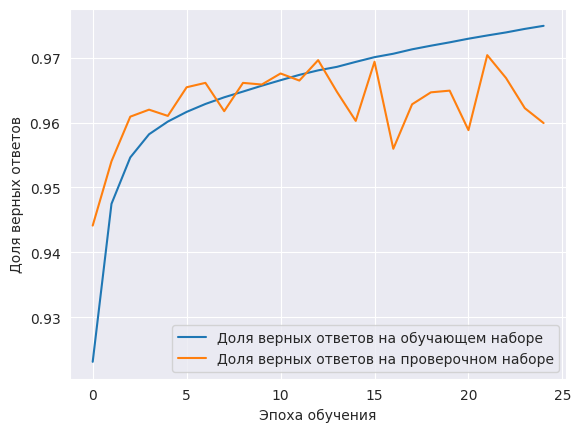

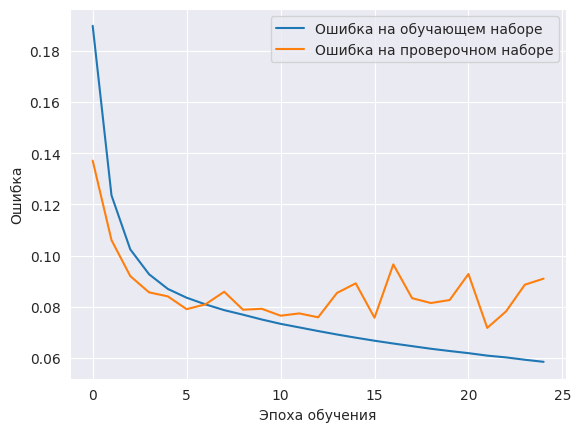

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model1.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=25,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
loss, acc = model1.evaluate(x_test, y_test, verbose=0)  #classification
acc

0.964009165763855

In [ ]:
loss, acc = model1.evaluate(x_test, y_test, verbose=1)

24008/24008 [==============================] - 28s 1ms/step - loss: 0.0872 - accuracy: 0.9640


24008/24008 [==============================] - 27s 1ms/step
[[360743   4230]
 [ 23420 379858]]


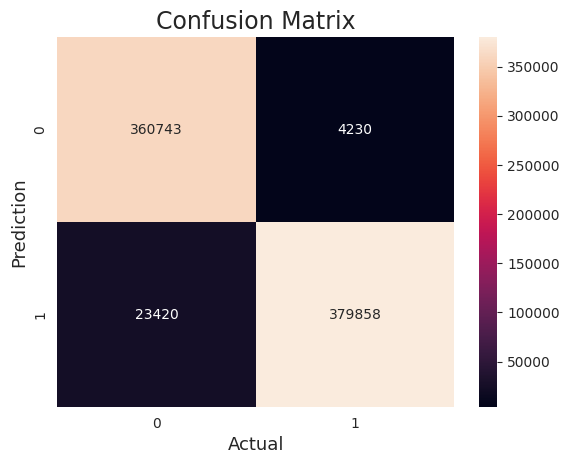

Accuracy   : 0.964009158465137


In [ ]:
# compute the confusion matrix
y_pred=model1.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test_pred, y_pred)
print("Accuracy   :", accuracy)

In [ ]:
#проверка работы сохраненной модели
model1.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model1.keras')
#model1 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model1.keras')

# Модель 2

In [ ]:
number_of_cols = x_train.shape[1]

model2 = Sequential() # Последовательная модель нейронной сети

model2.add(Dense(64, input_dim=number_of_cols, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(2, activation='softmax'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                2432      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,578
Trainable params: 4,578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/25
38812/38812 [==============================] - 79s 2ms/step - loss: 0.0577 - accuracy: 0.9755 - val_loss: 0.1010 - val_accuracy: 0.9555
Epoch 2/25
38812/38812 [==============================] - 78s 2ms/step - loss: 0.0568 - accuracy: 0.9760 - val_loss: 0.0830 - val_accuracy: 0.9642
Epoch 3/25
38812/38812 [==============================] - 78s 2ms/step - loss: 0.0561 - accuracy: 0.9765 - val_loss: 0.0931 - val_accuracy: 0.9589
Epoch 4/25
38812/38812 [==============================] - 78s 2ms/step - loss: 0.0552 - accuracy: 0.9772 - val_loss: 0.1112 - val_accuracy: 0.9524
Epoch 5/25
38812/38812 [==============================] - 78s 2ms/step - loss: 0.0544 - accuracy: 0.9776 - val_loss: 0.0822 - val_accuracy: 0.9638
Epoch 6/25
38812/38812 [==============================] - 80s 2ms/step - loss: 0.0536 - accuracy: 0.9781 - val_loss: 0.0847 - val_accuracy: 0.9628
Epoch 7/25
38812/38812 [==============================] - 80s 2ms/step - loss: 0.0528 - accuracy: 0.9786 - val_loss: 0

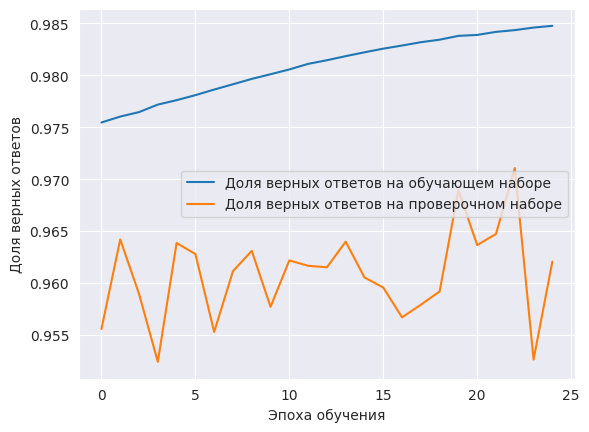

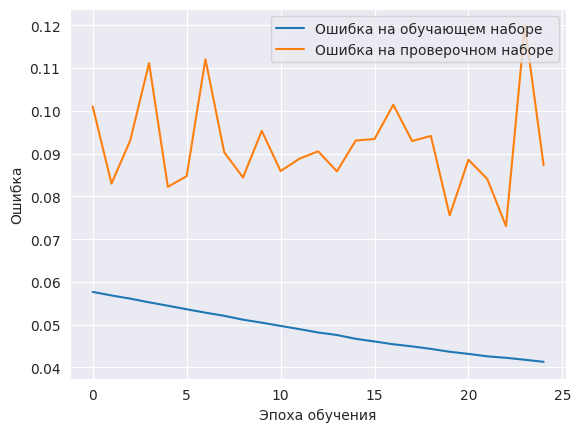

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model1.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=25,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
loss, acc = model2.evaluate(x_test, y_test, verbose=0)  #classification
acc

0.5249143838882446

24008/24008 [==============================] - 25s 1ms/step
[[     8 364965]
 [    20 403258]]


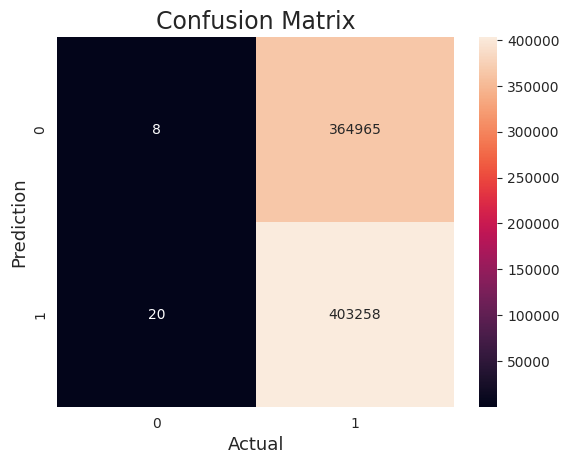

Accuracy   : 0.5249143834502005


In [ ]:
# compute the confusion matrix
y_pred=model2.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test_pred, y_pred)
print("Accuracy   :", accuracy)

In [ ]:
#проверка работы сохраненной модели
model2.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model2.keras')
#model2 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model2.keras')

# Модель 3

In [ ]:
number_of_cols = x_train.shape[1]

model3 = Sequential() # Последовательная модель нейронной сети

model3.add(Dense(512, input_dim=number_of_cols, kernel_initializer='lecun_normal', activation='selu'))
model3.add(Dense(256, kernel_initializer='lecun_normal', activation='selu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(2, activation='softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               19456     
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                 514       
                                                                 
Total params: 152,322
Trainable params: 151,810
Non-trainable params: 512
______________________________________________

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/30
38812/38812 [==============================] - 243s 6ms/step - loss: 0.1337 - accuracy: 0.9449 - val_loss: 0.1067 - val_accuracy: 0.9567
Epoch 2/30
38812/38812 [==============================] - 254s 7ms/step - loss: 0.1087 - accuracy: 0.9554 - val_loss: 0.4054 - val_accuracy: 0.9251
Epoch 3/30
38812/38812 [==============================] - 260s 7ms/step - loss: 0.1037 - accuracy: 0.9579 - val_loss: 0.5133 - val_accuracy: 0.8703
Epoch 4/30
38812/38812 [==============================] - 258s 7ms/step - loss: 0.1061 - accuracy: 0.9566 - val_loss: 0.0844 - val_accuracy: 0.9653
Epoch 5/30
38812/38812 [==============================] - 248s 6ms/step - loss: 0.1031 - accuracy: 0.9568 - val_loss: 0.1108 - val_accuracy: 0.9583
Epoch 6/30
38812/38812 [==============================] - 293s 8ms/step - loss: 0.1006 - accuracy: 0.9583 - val_loss: 0.1855 - val_accuracy: 0.9355
Epoch 7/30
38812/38812 [==============================] - 280s 7ms/step - loss: 0.1016 - accuracy: 0.9568 - val_

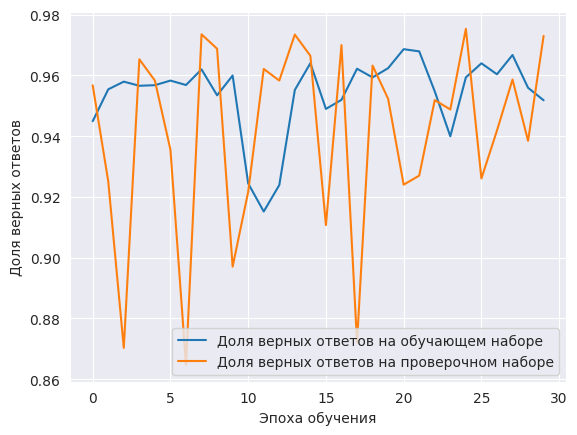

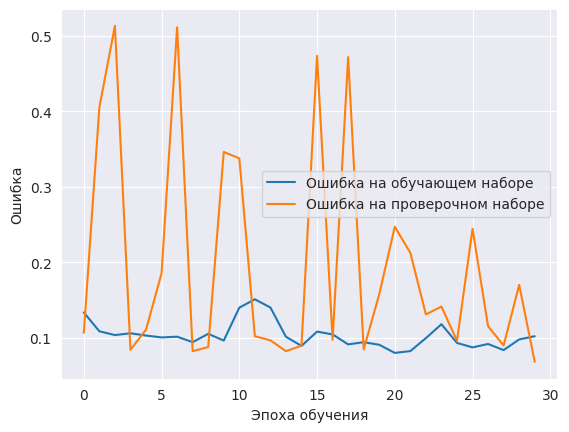

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model3.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=30,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения

print('Максимальное значение accuracy:', max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model3.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model3.keras')

In [ ]:
loss, acc = model3.evaluate(x_test, y_test, verbose=1) #classification
acc

24008/24008 [==============================] - 44s 2ms/step - loss: 0.1888 - accuracy: 0.9430


0.9430003762245178

24008/24008 [==============================] - 40s 2ms/step
[[364027    946]
 [ 42844 360434]]


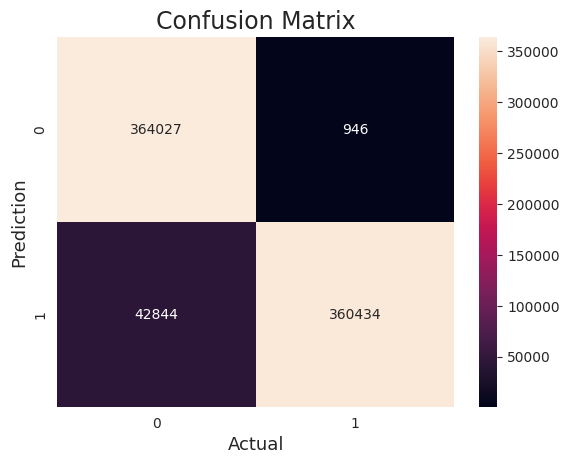

Accuracy   : 0.943000399608982


In [ ]:
# compute the confusion matrix
y_pred=model3.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test_pred, y_pred)
print("Accuracy   :", accuracy)

# Модель 4
Увеличила кол-во нейронов

In [ ]:
number_of_cols = x_train.shape[1]

model4 = Sequential() # Последовательная модель нейронной сети

model4.add(Dense(256, input_dim=number_of_cols, activation='selu'))
model4.add(Dense(64, activation='selu'))
model4.add(Dense(2, activation='softmax'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               9728      
                                                                 
 dense_13 (Dense)            (None, 64)                16448     
                                                                 
 dense_14 (Dense)            (None, 2)                 130       
                                                                 
Total params: 26,306
Trainable params: 26,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/30
38812/38812 [==============================] - 106s 3ms/step - loss: 0.1609 - accuracy: 0.9341 - val_loss: 0.1220 - val_accuracy: 0.9500
Epoch 2/30
38812/38812 [==============================] - 93s 2ms/step - loss: 0.0954 - accuracy: 0.9578 - val_loss: 0.0848 - val_accuracy: 0.9620
Epoch 3/30
38812/38812 [==============================] - 124s 3ms/step - loss: 0.0804 - accuracy: 0.9637 - val_loss: 0.0791 - val_accuracy: 0.9650
Epoch 4/30
38812/38812 [==============================] - 96s 2ms/step - loss: 0.0742 - accuracy: 0.9664 - val_loss: 0.0896 - val_accuracy: 0.9609
Epoch 5/30
38812/38812 [==============================] - 112s 3ms/step - loss: 0.0697 - accuracy: 0.9686 - val_loss: 0.0916 - val_accuracy: 0.9596
Epoch 6/30
38812/38812 [==============================] - 97s 2ms/step - loss: 0.0663 - accuracy: 0.9704 - val_loss: 0.0765 - val_accuracy: 0.9672
Epoch 7/30
38812/38812 [==============================] - 103s 3ms/step - loss: 0.0637 - accuracy: 0.9717 - val_los

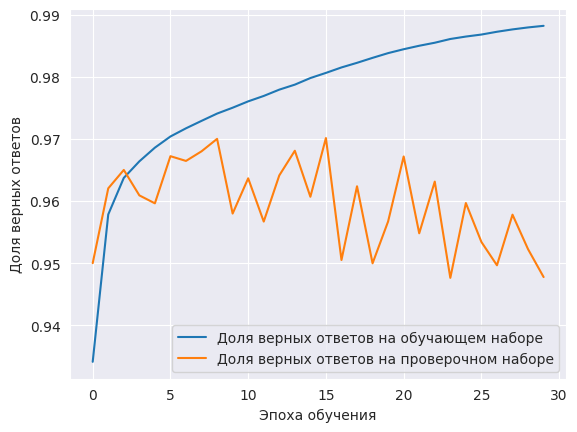

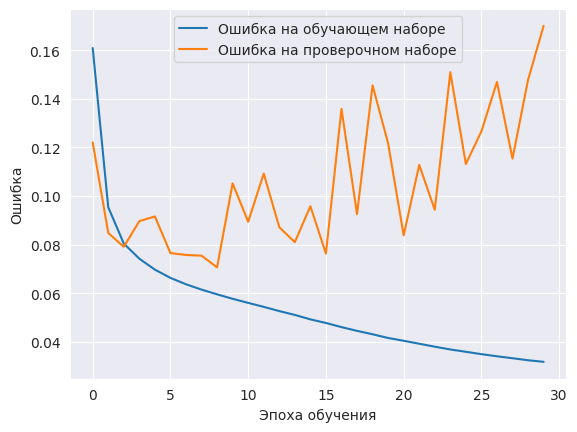

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model4.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=30,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
#проверка работы сохраненной модели
#model4.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model4.keras')
model4 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model4.keras')

In [ ]:
loss, acc = model4.evaluate(x_test, y_test, verbose=0)  #classification
acc

0.9690713286399841

24008/24008 [==============================] - 27s 1ms/step
[[361611   3362]
 [ 20399 382879]]


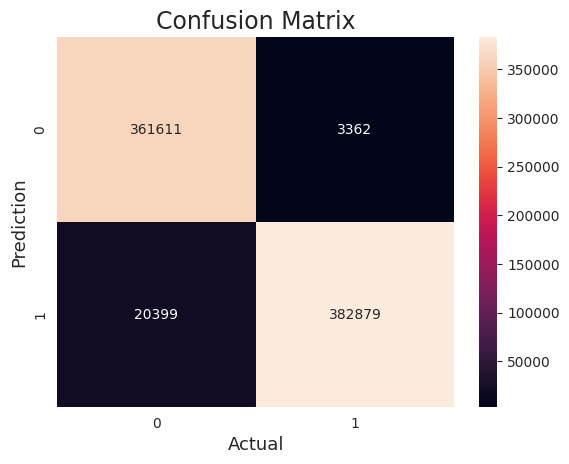

Accuracy   : 0.9690713061226084


In [ ]:
# compute the confusion matrix
y_pred=model4.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test_pred, y_pred)
print("Accuracy   :", accuracy)

# Модель 5

In [ ]:
number_of_cols = x_train.shape[1]

model5 = Sequential() # Последовательная модель нейронной сети

model5.add(Dense(256, input_dim=number_of_cols, activation='selu'))
model5.add(Dense(112, activation='selu'))
model5.add(Dense(2, activation='softmax'))
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               9728      
                                                                 
 dense_19 (Dense)            (None, 112)               28784     
                                                                 
 dense_20 (Dense)            (None, 2)                 226       
                                                                 
Total params: 38,738
Trainable params: 38,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/20
38812/38812 [==============================] - 126s 3ms/step - loss: 0.1003 - accuracy: 0.9553 - val_loss: 0.0891 - val_accuracy: 0.9603
Epoch 2/20
38812/38812 [==============================] - 124s 3ms/step - loss: 0.0842 - accuracy: 0.9616 - val_loss: 0.0897 - val_accuracy: 0.9618
Epoch 3/20
38812/38812 [==============================] - 128s 3ms/step - loss: 0.0767 - accuracy: 0.9648 - val_loss: 0.0845 - val_accuracy: 0.9656
Epoch 4/20
38812/38812 [==============================] - 129s 3ms/step - loss: 0.0711 - accuracy: 0.9676 - val_loss: 0.0867 - val_accuracy: 0.9608
Epoch 5/20
38812/38812 [==============================] - 124s 3ms/step - loss: 0.0670 - accuracy: 0.9698 - val_loss: 0.0862 - val_accuracy: 0.9628
Epoch 6/20
38812/38812 [==============================] - 118s 3ms/step - loss: 0.0635 - accuracy: 0.9718 - val_loss: 0.0905 - val_accuracy: 0.9590
Epoch 7/20
38812/38812 [==============================] - 126s 3ms/step - loss: 0.0606 - accuracy: 0.9734 - val_

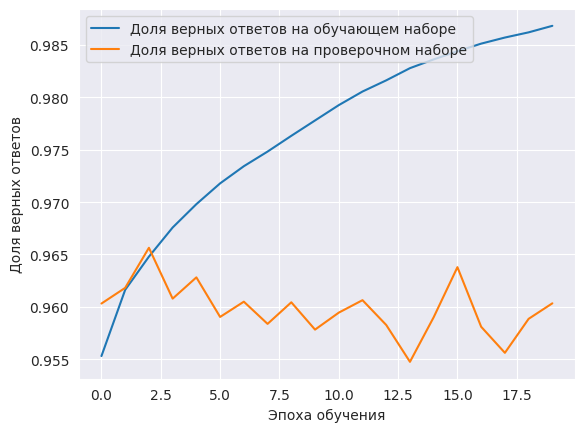

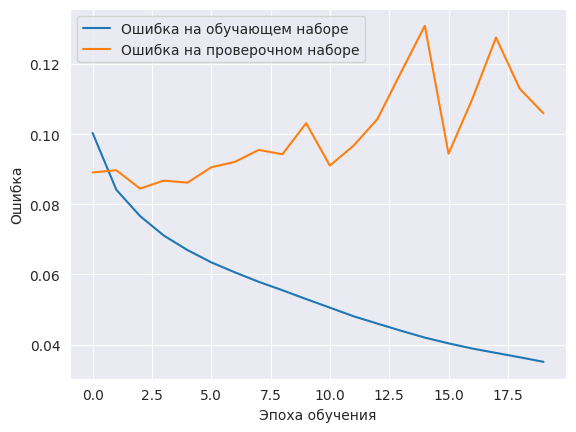

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model5.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
#проверка работы сохраненной модели
model5.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model5.keras')
#model5 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model5.keras')

In [ ]:
loss, acc = model5.evaluate(x_test, y_test, verbose=0)  #classification
acc

0.9648539423942566

24008/24008 [==============================] - 29s 1ms/step
[[361239   3734]
 [ 23267 380011]]


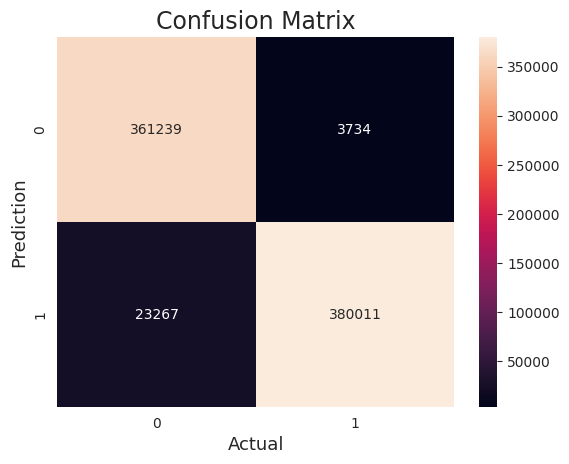

Accuracy   : 0.9648539344563171


In [ ]:
# compute the confusion matrix
y_pred=model5.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test_pred, y_pred)
print("Accuracy   :", accuracy)

# Модель 6 - можно попробовать дообучить

In [ ]:
number_of_cols = x_train.shape[1]

model6 = Sequential() # Последовательная модель нейронной сети

model6.add(Dense(64, input_dim=number_of_cols, activation='elu'))
model6.add(Dense(32, activation='elu'))
model6.add(Dense(2, activation='softmax'))

model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2432      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,578
Trainable params: 4,578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/25
19406/19406 [==============================] - 66s 3ms/step - loss: 0.2500 - accuracy: 0.9014 - val_loss: 0.1559 - val_accuracy: 0.9367
Epoch 2/25
19406/19406 [==============================] - 60s 3ms/step - loss: 0.1385 - accuracy: 0.9429 - val_loss: 0.1240 - val_accuracy: 0.9494
Epoch 3/25
19406/19406 [==============================] - 53s 3ms/step - loss: 0.1145 - accuracy: 0.9509 - val_loss: 0.1036 - val_accuracy: 0.9561
Epoch 4/25
19406/19406 [==============================] - 49s 3ms/step - loss: 0.1017 - accuracy: 0.9559 - val_loss: 0.0981 - val_accuracy: 0.9591
Epoch 5/25
19406/19406 [==============================] - 56s 3ms/step - loss: 0.0948 - accuracy: 0.9584 - val_loss: 0.0943 - val_accuracy: 0.9599
Epoch 6/25
19406/19406 [==============================] - 52s 3ms/step - loss: 0.0903 - accuracy: 0.9598 - val_loss: 0.0925 - val_accuracy: 0.9591
Epoch 7/25
19406/19406 [==============================] - 53s 3ms/step - loss: 0.0867 - accuracy: 0.9609 - val_loss: 0

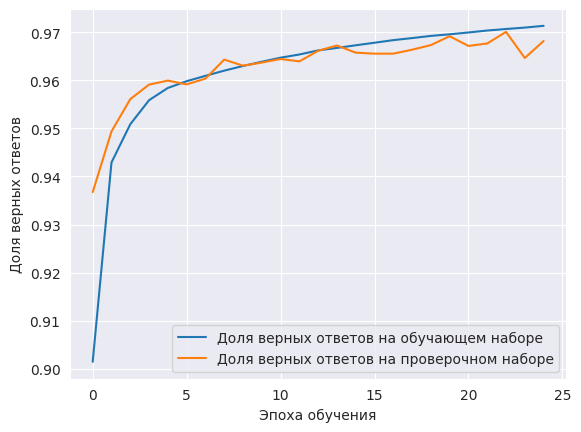

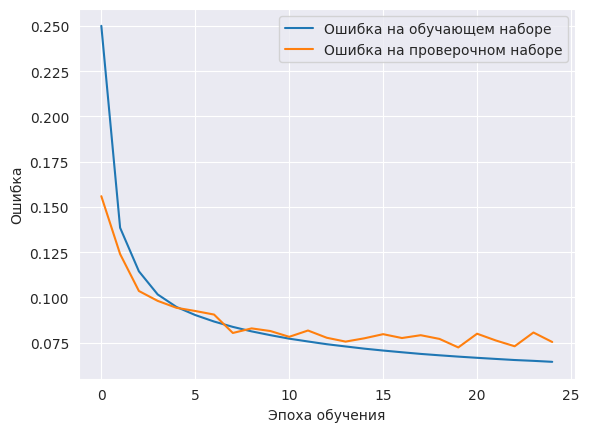

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model6.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=25,                             # Количество эпох
                        batch_size=128,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
loss, acc = model6.evaluate(x_test, y_test, verbose=0)  #classification
acc

0.9632411599159241

24008/24008 [==============================] - 37s 2ms/step
[[350531  14442]
 [ 13798 389480]]


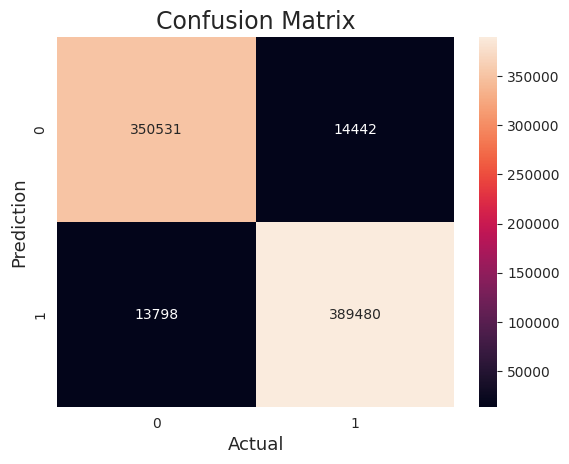

Accuracy   : 0.9632411802913371


In [ ]:
# compute the confusion matrix
y_pred=model6.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test_pred, y_pred)
print("Accuracy   :", accuracy)

In [ ]:
#проверка работы сохраненной модели
model6.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model6.keras')
#model1 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model1.keras')

# Модель 6-1

Изменение параметров в модели 6

Epoch 1/30
38812/38812 [==============================] - 120s 3ms/step - loss: 0.0655 - accuracy: 0.9711 - val_loss: 0.0790 - val_accuracy: 0.9666
Epoch 2/30
38812/38812 [==============================] - 99s 3ms/step - loss: 0.0649 - accuracy: 0.9714 - val_loss: 0.0758 - val_accuracy: 0.9688
Epoch 3/30
38812/38812 [==============================] - 97s 2ms/step - loss: 0.0643 - accuracy: 0.9718 - val_loss: 0.0768 - val_accuracy: 0.9686
Epoch 4/30
38812/38812 [==============================] - 103s 3ms/step - loss: 0.0636 - accuracy: 0.9721 - val_loss: 0.0780 - val_accuracy: 0.9690
Epoch 5/30
38812/38812 [==============================] - 113s 3ms/step - loss: 0.0631 - accuracy: 0.9724 - val_loss: 0.0799 - val_accuracy: 0.9661
Epoch 6/30
38812/38812 [==============================] - 104s 3ms/step - loss: 0.0626 - accuracy: 0.9728 - val_loss: 0.0760 - val_accuracy: 0.9676
Epoch 7/30
38812/38812 [==============================] - 106s 3ms/step - loss: 0.0619 - accuracy: 0.9731 - val_lo

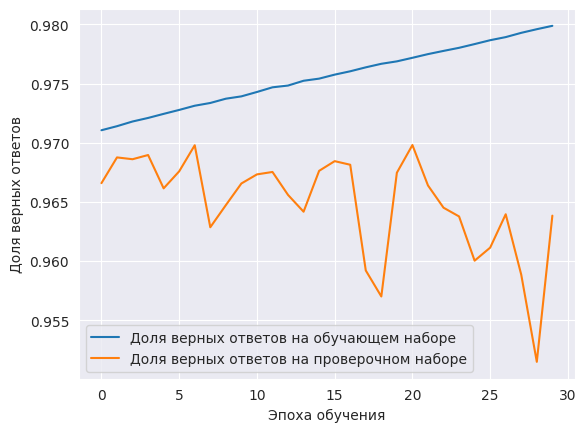

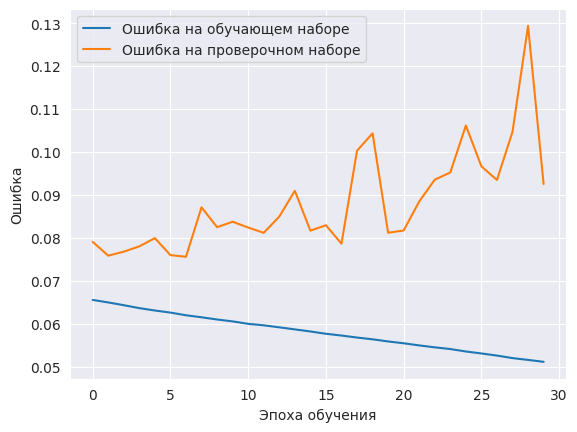

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model6.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=30,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
loss, acc = model6.evaluate(x_test, y_test, verbose=0)  #classification
acc

0.9599427580833435

# Модель 7  пока лучшая

In [ ]:
number_of_cols = x_train.shape[1]

model7 = Sequential() # Последовательная модель нейронной сети

model7.add(Dense(256, input_dim=number_of_cols, activation='elu'))
model7.add(Dense(64, activation='elu'))
model7.add(Dense(2, activation='softmax'))

model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               9728      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 26,306
Trainable params: 26,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model7.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/30
38812/38812 [==============================] - 134s 3ms/step - loss: 0.1666 - accuracy: 0.9326 - val_loss: 0.1090 - val_accuracy: 0.9517
Epoch 2/30
38812/38812 [==============================] - 120s 3ms/step - loss: 0.0967 - accuracy: 0.9576 - val_loss: 0.0871 - val_accuracy: 0.9608
Epoch 3/30
38812/38812 [==============================] - 121s 3ms/step - loss: 0.0831 - accuracy: 0.9625 - val_loss: 0.0845 - val_accuracy: 0.9615
Epoch 4/30
38812/38812 [==============================] - 115s 3ms/step - loss: 0.0763 - accuracy: 0.9654 - val_loss: 0.0778 - val_accuracy: 0.9680
Epoch 5/30
38812/38812 [==============================] - 120s 3ms/step - loss: 0.0718 - accuracy: 0.9675 - val_loss: 0.0762 - val_accuracy: 0.9670
Epoch 6/30
38812/38812 [==============================] - 121s 3ms/step - loss: 0.0683 - accuracy: 0.9693 - val_loss: 0.0799 - val_accuracy: 0.9655
Epoch 7/30
38812/38812 [==============================] - 117s 3ms/step - loss: 0.0655 - accuracy: 0.9708 - val_

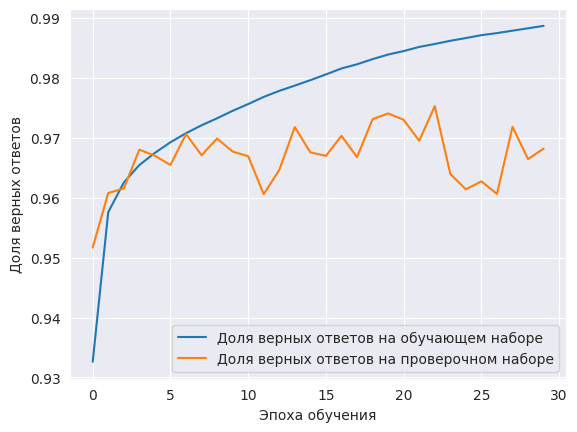

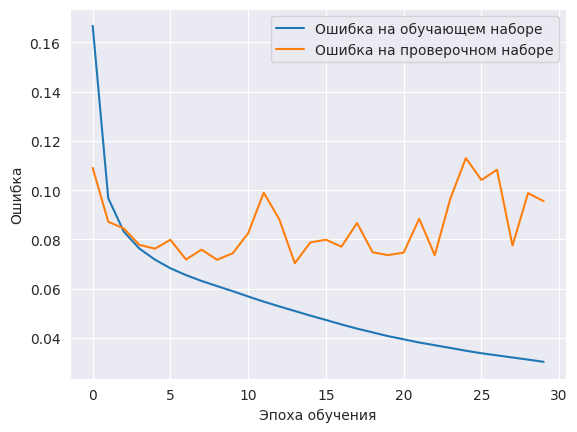

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model7.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=30,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
loss, acc = model7.evaluate(x_test, y_test, verbose=0)  #classification
acc

0.9713127613067627

24008/24008 [==============================] - 36s 1ms/step
[[358535   6438]
 [ 15601 387677]]


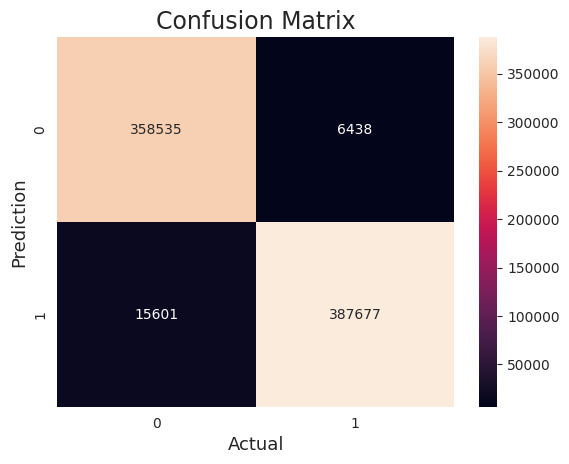

Accuracy   : 0.971312761063767


In [ ]:
# compute the confusion matrix
y_pred=model7.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test_pred, y_pred)
print("Accuracy   :", accuracy)

In [ ]:
#проверка работы сохраненной модели
#model7.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model7.keras')
model7 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model7.keras')

In [ ]:
weights = model7.get_weights() # Получим веса нашей модели (генерируются случайным образом)

In [ ]:
print(weights)

[array([[-1.1461114 , -0.26793268,  0.15911108, ...,  0.31286943,
         0.3559121 , -0.04356954],
       [-0.4111765 , -0.06608103, -0.384158  , ...,  0.2668018 ,
         0.16397776, -0.02480022],
       [ 0.01993545,  0.08663412,  0.01319396, ..., -0.05798296,
        -0.13999246, -0.14440677],
       ...,
       [-0.04336572, -0.04752157,  0.06951476, ...,  0.04115878,
         0.03759378, -0.0500106 ],
       [ 0.29459676,  0.2189077 ,  0.17469853, ..., -0.01878561,
        -1.0897288 ,  0.0151978 ],
       [ 0.17026319,  0.04067644,  0.12187156, ...,  0.04339192,
        -0.13168158,  0.0613998 ]], dtype=float32), array([-0.20829919,  0.17150837, -0.12201593, -0.01501571,  0.09269665,
       -0.2903703 , -0.16351281, -0.25798425, -0.28961697, -0.03151385,
       -0.0897273 ,  0.48942018, -0.15300491,  0.6470768 , -0.5026923 ,
        0.36809185,  0.01130354, -0.16829894,  0.31371054,  0.13366239,
       -0.17605896, -0.29751703, -0.2536437 ,  0.3752186 ,  0.39007896,
        0.

In [ ]:
# open a binary file in write mode
file = open('/content/gdrive/MyDrive/Стажировка1/2-1/models/model7_weights', "wb")
np.save(file, weights)
# close the file
file.close


<function BufferedWriter.close>

# Модель 8

In [ ]:
number_of_cols = x_train.shape[1]

model8 = Sequential() # Последовательная модель нейронной сети

model8.add(Dense(256, input_dim=number_of_cols, activation='elu'))
model8.add(Dense(112, activation='elu'))
model8.add(Dense(2, activation='softmax'))

model8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               9728      
                                                                 
 dense_4 (Dense)             (None, 112)               28784     
                                                                 
 dense_5 (Dense)             (None, 2)                 226       
                                                                 
Total params: 38,738
Trainable params: 38,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/Стажировка1/2-1/model8/model_weight_epoch_{epoch:02d}.h5", save_weight_only = True )

In [ ]:
model8.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/25
22179/22179 [==============================] - 133s 6ms/step - loss: 0.0713 - accuracy: 0.9676 - val_loss: 0.0829 - val_accuracy: 0.9655
Epoch 2/25
22179/22179 [==============================] - 132s 6ms/step - loss: 0.0677 - accuracy: 0.9695 - val_loss: 0.0832 - val_accuracy: 0.9625
Epoch 3/25
22179/22179 [==============================] - 132s 6ms/step - loss: 0.0648 - accuracy: 0.9710 - val_loss: 0.0843 - val_accuracy: 0.9705
Epoch 4/25
22179/22179 [==============================] - 133s 6ms/step - loss: 0.0622 - accuracy: 0.9725 - val_loss: 0.0696 - val_accuracy: 0.9700
Epoch 5/25
22179/22179 [==============================] - 131s 6ms/step - loss: 0.0601 - accuracy: 0.9738 - val_loss: 0.0778 - val_accuracy: 0.9657
Epoch 6/25
22179/22179 [==============================] - 132s 6ms/step - loss: 0.0581 - accuracy: 0.9749 - val_loss: 0.0831 - val_accuracy: 0.9630
Epoch 7/25
22179/22179 [==============================] - 130s 6ms/step - loss: 0.0563 - accuracy: 0.9760 - val_

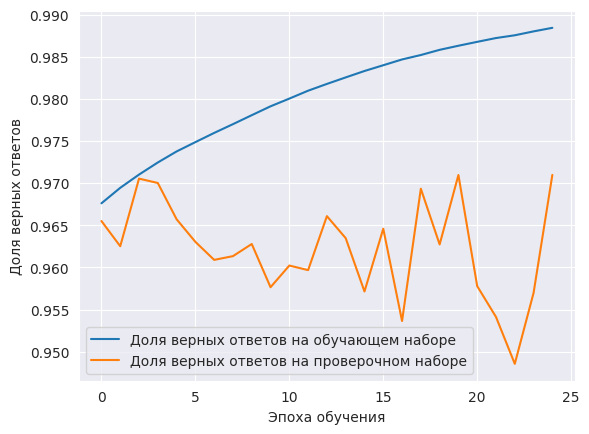

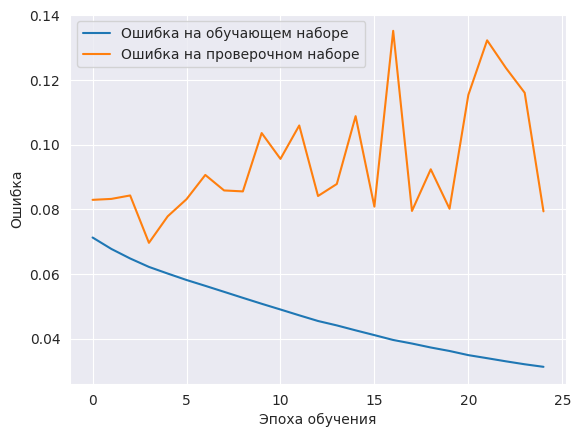

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model8.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=25,                             # Количество эпох
                        batch_size=112,                         # Размер подвыборки для одного шага по данным на эпохе
                        callbacks = [checkpoint],
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = ( end_time - start_time) /60 # calculate the total time

print("Total time taken:", total_time, "min") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
print(max(history.history['val_accuracy'])) # print the highest accuracy achieved by the model

0.9709854125976562


In [ ]:
loss, acc = model8.evaluate(x_test, y_test, verbose=1)  #classification
acc

24008/24008 [==============================] - 49s 2ms/step - loss: 0.1548 - accuracy: 0.9584


0.9583560824394226

In [ ]:
#проверка работы сохраненной модели
model8.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model8_8.keras')
#model8 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model8.keras')

24008/24008 [==============================] - 41s 2ms/step
[[360581   4392]
 [ 27601 375677]]


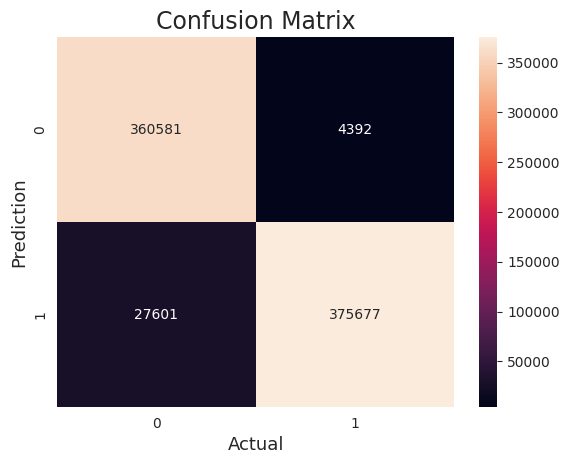

Accuracy   : 0.9583560581112163


In [ ]:
# compute the confusion matrix
y_pred=model8.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test_pred, y_pred)
print("Accuracy   :", accuracy)

# Модель 8-1

In [ ]:
model8_3 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model8_8.keras')

In [ ]:
epoch_num = 3
model8_3.load_weights(f"/content/gdrive/MyDrive/Стажировка1/2-1/model8/_model_weight_epoch_{epoch_num:02d}.h5")


In [ ]:
loss, acc = model8_3.evaluate(x_test, y_test, verbose=1)  #classification
acc

24008/24008 [==============================] - 63s 3ms/step - loss: 0.1047 - accuracy: 0.9608


0.9607966542243958

In [ ]:
model8_4 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model8_8.keras')
epoch_num = 4
model8_4.load_weights(f"/content/gdrive/MyDrive/Стажировка1/2-1/model8/_model_weight_epoch_{epoch_num:02d}.h5")


In [ ]:
loss, acc = model8_4.evaluate(x_test, y_test, verbose=1)  #classification
acc

24008/24008 [==============================] - 55s 2ms/step - loss: 0.0993 - accuracy: 0.9605


0.9604764580726624

In [ ]:
model8_25 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model8_8.keras')
epoch_num = 25
model8_25.load_weights(f"/content/gdrive/MyDrive/Стажировка1/2-1/model8/_model_weight_epoch_{epoch_num:02d}.h5")
loss, acc = model8_25.evaluate(x_test, y_test, verbose=1)  #classification
acc

24008/24008 [==============================] - 47s 2ms/step - loss: 0.1548 - accuracy: 0.9584


0.9583560824394226

# Модель 9

In [ ]:
number_of_cols = x_train.shape[1]

model9 = Sequential() # Последовательная модель нейронной сети

model9.add(Dense(256, input_dim=number_of_cols, activation='elu'))
model9.add(Dense(112, activation='elu'))
model9.add(Dense(2, activation='softmax'))

model9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               9728      
                                                                 
 dense_7 (Dense)             (None, 112)               28784     
                                                                 
 dense_8 (Dense)             (None, 2)                 226       
                                                                 
Total params: 38,738
Trainable params: 38,738
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/Стажировка1/2-1/model9/model_weight_epoch_{epoch:02d}.h5", save_weight_only = True )
model9.compile(optimizer=Nadam(learning_rate=0.00001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [ ]:
epoch_num = 3
model9.load_weights(f"/content/gdrive/MyDrive/Стажировка1/2-1/model8/_model_weight_epoch_{epoch_num:02d}.h5")

Epoch 1/25
38812/38812 [==============================] - 211s 5ms/step - loss: 0.0594 - accuracy: 0.9739 - val_loss: 0.0846 - val_accuracy: 0.9646
Epoch 2/25
38812/38812 [==============================] - 196s 5ms/step - loss: 0.0588 - accuracy: 0.9742 - val_loss: 0.0797 - val_accuracy: 0.9669
Epoch 3/25
38812/38812 [==============================] - 209s 5ms/step - loss: 0.0583 - accuracy: 0.9746 - val_loss: 0.0910 - val_accuracy: 0.9606
Epoch 4/25
38812/38812 [==============================] - 220s 6ms/step - loss: 0.0578 - accuracy: 0.9749 - val_loss: 0.0917 - val_accuracy: 0.9610
Epoch 5/25
38812/38812 [==============================] - 198s 5ms/step - loss: 0.0573 - accuracy: 0.9753 - val_loss: 0.0898 - val_accuracy: 0.9618
Epoch 6/25
38812/38812 [==============================] - 203s 5ms/step - loss: 0.0569 - accuracy: 0.9756 - val_loss: 0.0802 - val_accuracy: 0.9649
Epoch 7/25
38812/38812 [==============================] - 195s 5ms/step - loss: 0.0564 - accuracy: 0.9758 - val_

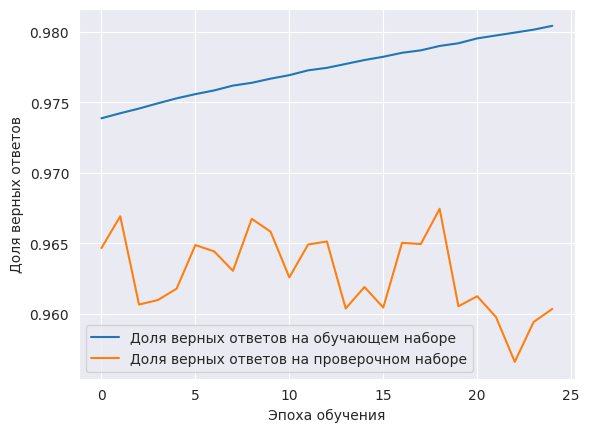

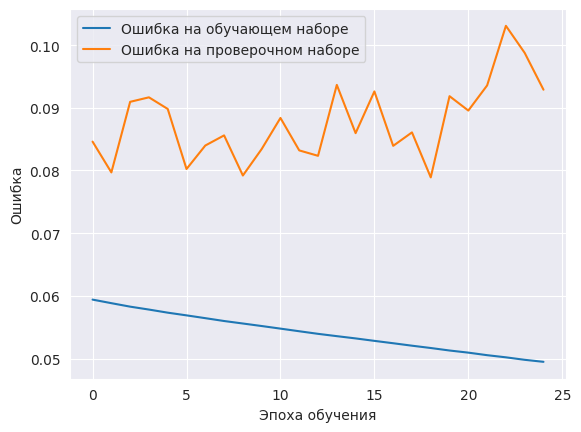

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model9.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=25,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        callbacks = [checkpoint],
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = ( end_time - start_time) /60 # calculate the total time

print("Общее время обучения:", total_time, "min") # print the total time taken to train the model
print("На обучающей выборке точность  - ", max(history.history['accuracy'])) # print the highest accuracy achieved by the model
print("На валидационной выборке точность  - ", max(history.history['val_accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
#проверка работы сохраненной модели
model9.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model9.keras')
#model8 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model8.keras')

24008/24008 [==============================] - 42s 2ms/step
[[360763   4210]
 [ 25407 377871]]


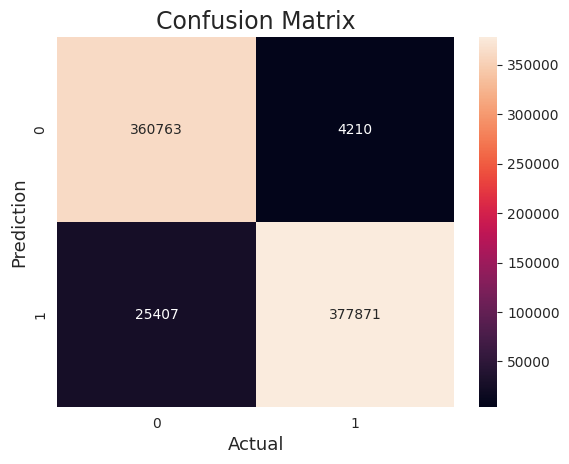

Accuracy   : 0.9614487973331632


In [ ]:
# compute the confusion matrix
y_pred=model9.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test_pred=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test_pred, y_pred)
print("Accuracy   :", accuracy)

# Модель 6-2

In [ ]:
model6 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model6.keras')
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2432      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4,578
Trainable params: 4,578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/Стажировка1/2-1/model6_2/model_weight_epoch_{epoch:02d}.h5", save_weight_only = True )

Epoch 1/25
19406/19406 [==============================] - 57s 3ms/step - loss: 0.0639 - accuracy: 0.9716 - val_loss: 0.0750 - val_accuracy: 0.9680
Epoch 2/25
19406/19406 [==============================] - 74s 4ms/step - loss: 0.0635 - accuracy: 0.9719 - val_loss: 0.0732 - val_accuracy: 0.9697
Epoch 3/25
19406/19406 [==============================] - 75s 4ms/step - loss: 0.0630 - accuracy: 0.9722 - val_loss: 0.0738 - val_accuracy: 0.9703
Epoch 4/25
19406/19406 [==============================] - 55s 3ms/step - loss: 0.0626 - accuracy: 0.9725 - val_loss: 0.0742 - val_accuracy: 0.9703
Epoch 5/25
19406/19406 [==============================] - 51s 3ms/step - loss: 0.0620 - accuracy: 0.9727 - val_loss: 0.0709 - val_accuracy: 0.9713
Epoch 6/25
19406/19406 [==============================] - 50s 3ms/step - loss: 0.0617 - accuracy: 0.9730 - val_loss: 0.0719 - val_accuracy: 0.9709
Epoch 7/25
19406/19406 [==============================] - 54s 3ms/step - loss: 0.0614 - accuracy: 0.9732 - val_loss: 0

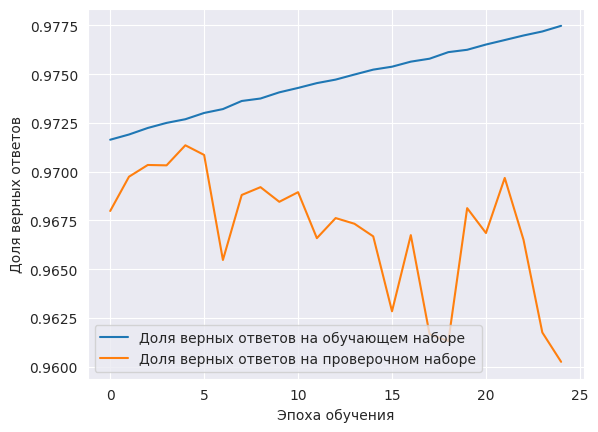

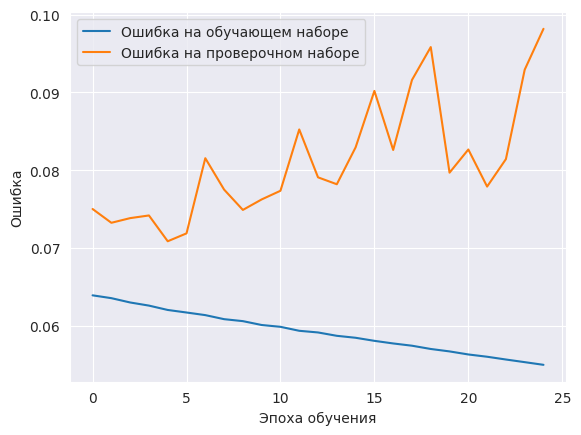

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model6.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=25,                             # Количество эпох
                        batch_size=128,                         # Размер подвыборки для одного шага по данным на эпохе
                        callbacks = [checkpoint],
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = (end_time - start_time)/60 # calculate the total time

print("Total time taken:", total_time, "minutes") # print the total time taken to train the model
#print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

print("На обучающей выборке точность  - ", max(history.history['accuracy'])) # print the highest accuracy achieved by the model
print("На валидационной выборке точность  - ", max(history.history['val_accuracy'])) # print the highest accuracy achieved by the model


plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model6.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model6_2.keras')

In [ ]:
loss, acc = model6.evaluate(x_test, y_test, verbose=1)  #classification
acc

24008/24008 [==============================] - 54s 2ms/step - loss: 0.1034 - accuracy: 0.9607


0.9606808423995972

In [ ]:
model6_5 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model6_2.keras')

In [ ]:
epoch_num = 5
model6_5.load_weights(f"/content/gdrive/MyDrive/Стажировка1/2-1/model6_2/_model_weight_epoch_{epoch_num:02d}.h5")

In [ ]:
loss, acc = model6_5.evaluate(x_test, y_test, verbose=1)  #classification
acc

24008/24008 [==============================] - 35s 1ms/step - loss: 0.0899 - accuracy: 0.9632


0.9631592035293579

Epoch 1/20
38812/38812 [==============================] - 106s 3ms/step - loss: 0.0633 - accuracy: 0.9723 - val_loss: 0.0768 - val_accuracy: 0.9694
Epoch 2/20
38812/38812 [==============================] - 95s 2ms/step - loss: 0.0628 - accuracy: 0.9726 - val_loss: 0.0772 - val_accuracy: 0.9706
Epoch 3/20
38812/38812 [==============================] - 101s 3ms/step - loss: 0.0623 - accuracy: 0.9729 - val_loss: 0.0746 - val_accuracy: 0.9692
Epoch 4/20
38812/38812 [==============================] - 101s 3ms/step - loss: 0.0618 - accuracy: 0.9733 - val_loss: 0.0711 - val_accuracy: 0.9738
Epoch 5/20
38812/38812 [==============================] - 100s 3ms/step - loss: 0.0612 - accuracy: 0.9735 - val_loss: 0.0756 - val_accuracy: 0.9720
Epoch 6/20
38812/38812 [==============================] - 100s 3ms/step - loss: 0.0608 - accuracy: 0.9739 - val_loss: 0.0738 - val_accuracy: 0.9713
Epoch 7/20
38812/38812 [==============================] - 93s 2ms/step - loss: 0.0604 - accuracy: 0.9742 - val_lo

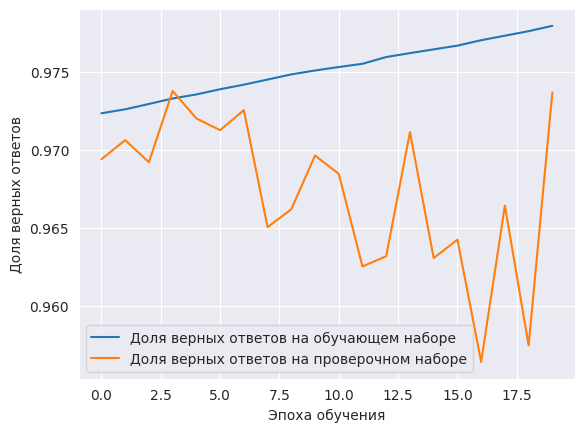

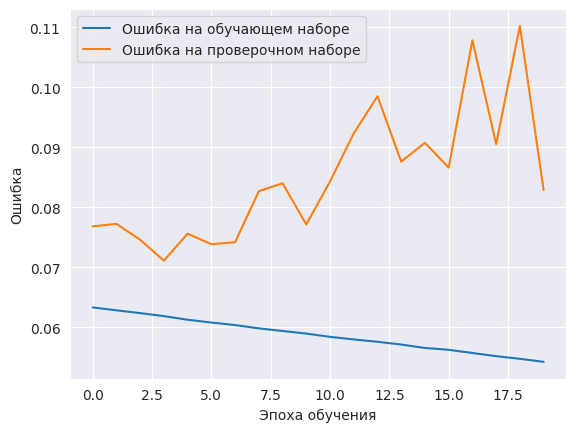

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model6_5.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        callbacks = [checkpoint],
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = (end_time - start_time)/60 # calculate the total time

print("Total time taken:", total_time, "minutes") # print the total time taken to train the model
#print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

print("На обучающей выборке точность  - ", max(history.history['accuracy'])) # print the highest accuracy achieved by the model
print("На валидационной выборке точность  - ", max(history.history['val_accuracy'])) # print the highest accuracy achieved by the model


plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
loss, acc = model6_5.evaluate(x_test, y_test, verbose=1)  #classification
acc

In [ ]:
epoch_num = 4
model6_5.load_weights(f"/content/gdrive/MyDrive/Стажировка1/2-1/model6_2/_model_weight_epoch_{epoch_num:02d}.h5")

In [ ]:
model6_5.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model6_5.keras')

# Модель 7-1

In [ ]:
model7 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model7.keras')
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               9728      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 26,306
Trainable params: 26,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/Стажировка1/2-1/model7_3/model_weight_epoch_{epoch:02d}.h5", save_weight_only = True )

In [ ]:
model7.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/50
33568/33568 [==============================] - 136s 4ms/step - loss: 0.0147 - accuracy: 0.9948 - val_loss: 0.1353 - val_accuracy: 0.9684
Epoch 2/50
33568/33568 [==============================] - 125s 4ms/step - loss: 0.0145 - accuracy: 0.9948 - val_loss: 0.1239 - val_accuracy: 0.9721
Epoch 3/50
33568/33568 [==============================] - 119s 4ms/step - loss: 0.0145 - accuracy: 0.9949 - val_loss: 0.1558 - val_accuracy: 0.9643
Epoch 4/50
33568/33568 [==============================] - 128s 4ms/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 0.1438 - val_accuracy: 0.9664
Epoch 5/50
33568/33568 [==============================] - 123s 4ms/step - loss: 0.0139 - accuracy: 0.9951 - val_loss: 0.1407 - val_accuracy: 0.9692
Epoch 6/50
33568/33568 [==============================] - 135s 4ms/step - loss: 0.0139 - accuracy: 0.9951 - val_loss: 0.1412 - val_accuracy: 0.9681
Epoch 7/50
33568/33568 [==============================] - 126s 4ms/step - loss: 0.0140 - accuracy: 0.9952 - val_

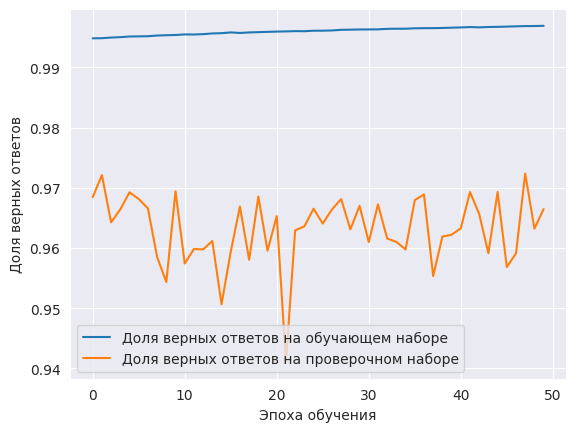

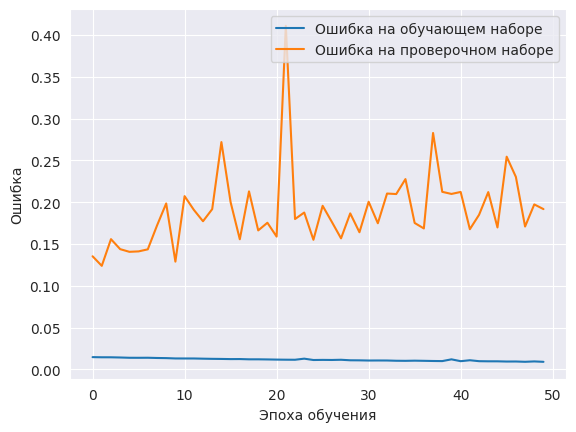

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model7.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=50,                             # Количество эпох
                        batch_size=74,                         # Размер подвыборки для одного шага по данным на эпохе
                        callbacks = [checkpoint],
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = (end_time - start_time)/60 # calculate the total time

print("Total time taken:", total_time, "minutes") # print the total time taken to train the model
#print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

print("На обучающей выборке точность  - ", max(history.history['accuracy'])) # print the highest accuracy achieved by the model
print("На валидационной выборке точность  - ", max(history.history['val_accuracy'])) # print the highest accuracy achieved by the model


plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model7.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model7_4.keras')


In [ ]:
loss, acc = model7.evaluate(x_test, y_test, verbose=1)  #classification
acc

24008/24008 [==============================] - 45s 2ms/step - loss: 0.2237 - accuracy: 0.9696


0.9696349501609802

In [ ]:
epoch_num = 10
model7.load_weights(f"/content/gdrive/MyDrive/Стажировка1/2-1/model7_3/model_weight_epoch_{epoch_num:02d}.h5")



In [ ]:
model7 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model7_3.keras')

# Модель 10

In [20]:
model10 = load_model('/content/gdrive/MyDrive/Стажировка1/2-1/models/model7.keras')

In [21]:
model10.compile(optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [22]:
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/Стажировка1/2-1/model10/model_weight_epoch_{epoch:02d}.h5", save_weight_only = True )

Epoch 1/25
38812/38812 [==============================] - 113s 3ms/step - loss: 0.1232 - accuracy: 0.9535 - val_loss: 0.3295 - val_accuracy: 0.8458
Epoch 2/25
38812/38812 [==============================] - 110s 3ms/step - loss: 0.0937 - accuracy: 0.9618 - val_loss: 0.1090 - val_accuracy: 0.9646
Epoch 3/25
38812/38812 [==============================] - 108s 3ms/step - loss: 0.0894 - accuracy: 0.9644 - val_loss: 0.1292 - val_accuracy: 0.9648
Epoch 4/25
38812/38812 [==============================] - 105s 3ms/step - loss: 0.0862 - accuracy: 0.9664 - val_loss: 0.1363 - val_accuracy: 0.9642
Epoch 5/25
38812/38812 [==============================] - 111s 3ms/step - loss: 0.0848 - accuracy: 0.9676 - val_loss: 0.1312 - val_accuracy: 0.9645
Epoch 6/25
38812/38812 [==============================] - 109s 3ms/step - loss: 0.0839 - accuracy: 0.9685 - val_loss: 0.1601 - val_accuracy: 0.9625
Epoch 7/25
38812/38812 [==============================] - 107s 3ms/step - loss: 0.0841 - accuracy: 0.9690 - val_

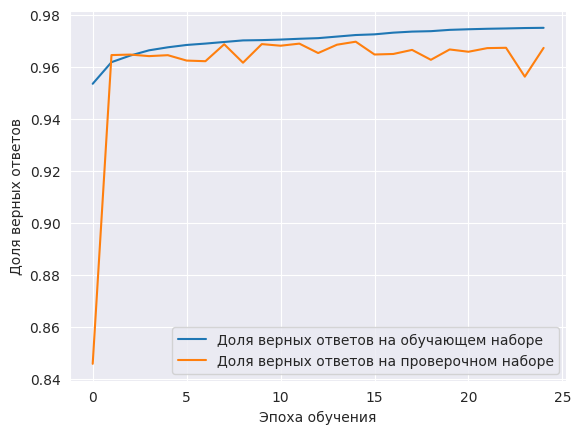

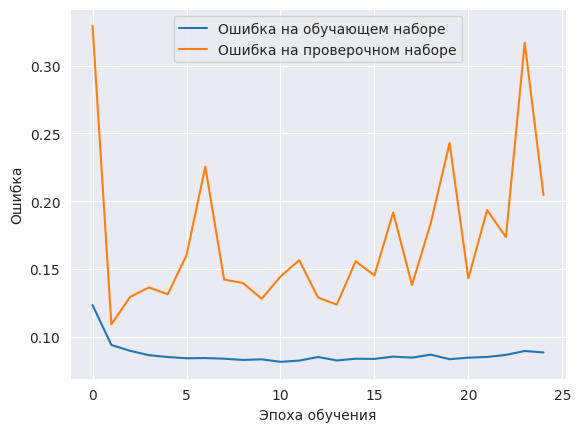

In [23]:
import time
start_time = time.time() # счетчик времени
history = model10.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=25,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        callbacks = [checkpoint],
                        validation_data=(x_val, y_val))        # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = (end_time - start_time)/60 # calculate the total time

print("Total time taken:", total_time, "minutes") # print the total time taken to train the model
#print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

print("На обучающей выборке точность  - ", max(history.history['accuracy'])) # print the highest accuracy achieved by the model
print("На валидационной выборке точность  - ", max(history.history['val_accuracy'])) # print the highest accuracy achieved by the model


plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [24]:
model10.save('/content/gdrive/MyDrive/Стажировка1/2-1/models/model10.keras')

In [25]:
loss, acc = model10.evaluate(x_test, y_test, verbose=1)  #classification
acc

24008/24008 [==============================] - 54s 2ms/step - loss: 0.3118 - accuracy: 0.9490


0.9489919543266296